In [96]:
import jax.numpy as jnp

import pandas as pd

import make_df

import matplotlib.pyplot as plt

In [97]:
def fun(x):
    return (x[:,0]**2 + x[:,1] - 11)**2 / 800.0 + (x[:,0] + x[:,1]**2 -7)**2 / 800.0

In [98]:
# name of the function
name = "him"
# directory where to save stuff
in_dir = "./sparse"

# How many function and derivative observations should be chosen
list_f_vals = [1, 5, 20, 50]
list_d_vals = [200, 400, 800, 1500]
# Dimension of datapoints

# optimizer type
optimizers = ["L-BFGS-B", "TNC", "SLSQP"]
iters_per_optimmizer = 10

# Grid on which to evaluate the function
bounds = jnp.array([[-5.0, -5.0], [5.0, 5.0]])
eval_grid = jnp.linspace(bounds[0], bounds[1],100).T
eval_grid = jnp.array(jnp.meshgrid(*eval_grid)).reshape(2,-1).T

# sparsification
sparse = True
subset_size = 0.1

In [99]:
data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, sparse, subset_size, fun, eval_grid)

In [100]:
data.head(5)

,f,d,opt,mses,maxerrs,maxstds,true_in_confs,mean_mse,max_mse,min_mse
0,1,200,L-BFGS-B,"[0.026116418, 0.1243447, 0.0836848, 0.05661661...","[0.4509043, 0.55459285, 0.6865375, 0.5339667, ...","[0.23885532, 0.42832863, 0.09989877, 0.1478967...","[0.509, 0.0106, 0.098299995, 0.2645, 0.4906, 0...",0.11378186,0.3835344,0.026116418
1,1,200,TNC,"[0.008969939, 0.088534534, 0.61109656, 0.09201...","[0.33744818, 0.60607314, 1.2002885, 0.6173905,...","[0.41320455, 0.14210558, 0.6248757, 0.15495305...","[0.86649996, 0.19489999, 0.0, 0.2113, 0.0246, ...",0.13003986,0.61109656,0.008969939
2,1,200,SLSQP,"[0.18085654, 0.29514053, 0.012871736, 0.018492...","[0.68649006, 0.94639015, 0.2460637, 0.31304863...","[0.14858113, 0.24748366, 0.3175427, 0.15497154...","[0.0308, 0.0, 0.66639996, 0.5804, 0.7547, 0.57...",0.0706678,0.29514053,0.005441974
3,1,400,L-BFGS-B,"[0.035969052, 0.044931922, 0.0020726253, 0.030...","[0.298216, 0.44173884, 0.19230342, 0.4172184, ...","[nan, 0.18330128, nan, 0.12276729, 0.14657016,...","[0.0, 0.012399999, 0.0, 0.45029998, 1.0, 0.0, ...",0.04639906,0.12991281,0.00100029
4,1,400,TNC,"[0.0050327047, 0.02195622, 0.05817162, 0.11091...","[0.20811152, 0.25879675, 0.5749023, 0.5201278,...","[nan, 0.1354262, nan, 0.24463758, 0.27251348, ...","[0.0, 0.2251, 0.0, 0.0, 0.0224, 0.5489, 0.9343...",0.054061014,0.2441164,0.0021440268


In [101]:
# bfgs_data = data[data["opt"] == "SLSQP"]
bfgs_data = data[data["opt"] == "L-BFGS-B"]

Text(0, 0.5, 'MSE')

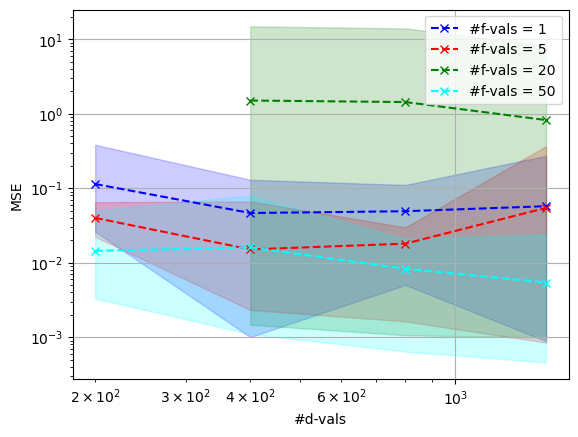

In [102]:
colors = ["b", "r", "g", "cyan"]

for c,f in zip(colors, bfgs_data["f"].unique()):
    temp = bfgs_data[bfgs_data["f"] == f]
    mean_mse = temp["mean_mse"]
    min_mse = temp["min_mse"]
    max_mse = temp["max_mse"]
    dvals = temp["d"]
    plt.plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
    plt.fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
    plt.yscale("log")
    plt.xscale("log")

plt.grid()
plt.legend()
plt.xlabel("#d-vals")
plt.ylabel("MSE")